## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
!nvidia-smi

Sat Oct 10 04:15:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   49C    P8    17W / 170W |   1071MiB /  6144MiB |     17%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "TCC/WDDM"

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_unit = 10 , num_nerous=[512,256,128,64,32]):
    input_layer=keras.layers.Input(input_shape)
    for i, num  in enumerate(num_nerous):
        if i==0:
            x = keras.layers.Dense(units = num,
                                  activation = 'relu',
                                  name ='hidden_layers'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = num,
                                  activation = 'relu',
                                  name = 'hidden_layers'+str(i+1))(x)
    out = keras.layers.Dense(units = output_unit,
                            activation = 'softmax',
                            name = 'output_layers')(x)
    model = keras.models.Model(inputs = [input_layer],
                              outputs = [out])
            

    return model



In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layers1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layers2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layers3 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layers4 (Dense)       (None, 64)                8256      
_________________________________________________________________
hidden_layers5 (Dense)       (None, 32)                2080      
_________________________________________________________________
output_layers (Dense)        (None, 10)               

In [10]:
"""Code Here
設定超參數
"""
learning_rate =[ 0.001,0.01,0.05,0.1]
EPOCH = 20
BATCH_SIZE = 150



In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for rate in learning_rate:
    optimizer = keras.optimizers.Adam(lr=rate)
    model.compile(loss = 'categorical_crossentropy' ,
                 metrics = ['accuracy'],
                 optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs=EPOCH,
             batch_size = BATCH_SIZE,
            validation_data=(x_test,y_test),
             shuffle = True)
    keys='learning_rate:'+str(rate)
    results[keys]={'train_loss' : model.history.history['loss'],
                    'valid_loss' : model.history.history['val_loss'],
                    'train_acc' : model.history.history['accuracy'],
                    'valid_acc' : model.history.history['val_accuracy']}

Epoch 1/20
334/334 [==============================] - 3s 8ms/step - loss: 1.9386 - accuracy: 0.2925 - val_loss: 1.7547 - val_accuracy: 0.3623
Epoch 2/20
334/334 [==============================] - 3s 8ms/step - loss: 1.7336 - accuracy: 0.3756 - val_loss: 1.6657 - val_accuracy: 0.4154
Epoch 3/20
334/334 [==============================] - 3s 8ms/step - loss: 1.6281 - accuracy: 0.4151 - val_loss: 1.5668 - val_accuracy: 0.4422
Epoch 4/20
334/334 [==============================] - 3s 8ms/step - loss: 1.5698 - accuracy: 0.4369 - val_loss: 1.5418 - val_accuracy: 0.4582
Epoch 5/20
334/334 [==============================] - 3s 8ms/step - loss: 1.5180 - accuracy: 0.4573 - val_loss: 1.5048 - val_accuracy: 0.4644
Epoch 6/20
334/334 [==============================] - 2s 7ms/step - loss: 1.4827 - accuracy: 0.4683 - val_loss: 1.4830 - val_accuracy: 0.4699
Epoch 7/20
334/334 [==============================] - 3s 8ms/step - loss: 1.4470 - accuracy: 0.4818 - val_loss: 1.4713 - val_accuracy: 0.4833
Epoch 

334/334 [==============================] - 3s 8ms/step - loss: 2.3056 - accuracy: 0.0985 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 19/20
334/334 [==============================] - 3s 8ms/step - loss: 2.3049 - accuracy: 0.1009 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 20/20
334/334 [==============================] - 3s 8ms/step - loss: 2.3057 - accuracy: 0.0999 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 1/20
334/334 [==============================] - 3s 8ms/step - loss: 2.3080 - accuracy: 0.1006 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 2/20
334/334 [==============================] - 3s 8ms/step - loss: 2.3080 - accuracy: 0.1001 - val_loss: 2.3130 - val_accuracy: 0.1000
Epoch 3/20
334/334 [==============================] - 3s 8ms/step - loss: 2.3086 - accuracy: 0.0969 - val_loss: 2.3103 - val_accuracy: 0.1000
Epoch 4/20
334/334 [==============================] - 3s 8ms/step - loss: 2.3089 - accuracy: 0.1000 - val_loss: 2.3094 - val_accuracy: 0.1000
Epoch 5/20
334/

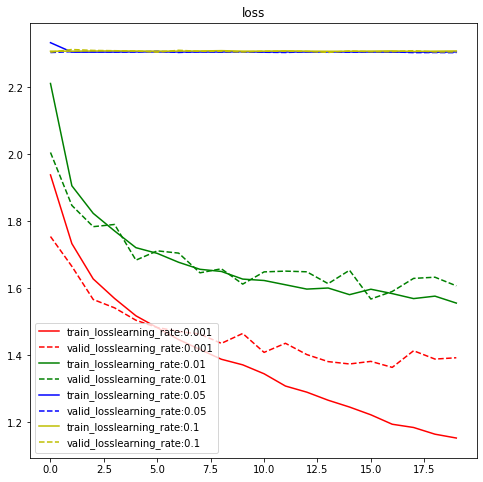

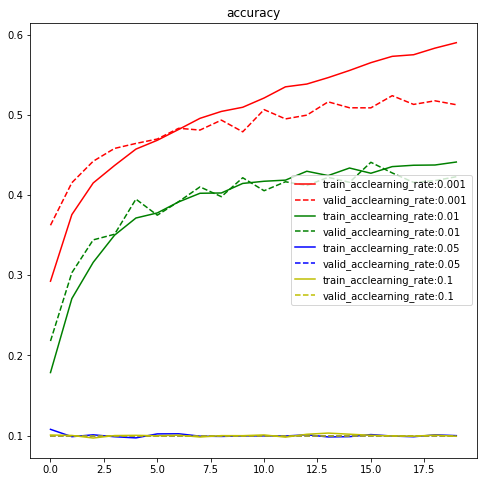

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y']
plt.figure(figsize=(8,8))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',
             label = 'train_loss'+str(cond),color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'],'--',
             label = 'valid_loss'+str(cond),color = color_bar[i],)
    plt.legend(loc='best')
    plt.title('loss')
plt.show()

plt.figure(figsize=(8,8))
for i ,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',
             label = 'train_acc'+str(cond),color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'],'--',
             label = 'valid_acc'+str(cond),color = color_bar[i])
    plt.legend(loc='best')
    plt.title('accuracy')
plt.show()